## Tasmanian Dolerites
### Model 1 - One sill

In [ ]:
from datetime import datetime
datetime.now().isoformat(timespec='seconds')   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loop library
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer 

# geometrical conceptual models
from LoopStructural.modelling.intrusions import ellipse_function, parallelepiped_function

#DEM functions
from LoopStructural.utils.dtm_creator import create_dtm_with_rasterio as create_dtm

In [2]:
lower_extent = [511530, 5238858, -500]
upper_extent = [541353, 5267079, 2000]

In [3]:
def create_dtm(xy):
    xyz_csv = pd.read_csv('C:/Users/falv0002/Documents/Repositories/LoopIntrusions/CaseStudy1_TassieDolerites/DEM/DEM_Data_Z200.csv')
    xyz_arr = xyz_csv.to_numpy()
    return xyz_arr[:,2]
    

In [4]:
model_data = pd.read_csv('Model_Data.csv')

In [5]:
topo = pd.read_csv('C:/Users/falv0002/Documents/Repositories/LoopIntrusions/CaseStudy1_TassieDolerites/DEM/DEM_Data_Z100.csv')
topo = topo.sample(frac = 0.005)
topo['val'] = 0
topo['feature_name'] = 'topo'
topo.reset_index(inplace=True)
topo.loc[0,['gx','gy','gz']] = [0,0,1]

model_data = pd.concat([model_data,topo])

In [6]:
# Create Geological Model

model = GeologicalModel(lower_extent,upper_extent)
model.nsteps = [50,50,200]
# model.nsteps = [50,50,100]
model.data = model_data
# model.dtm = create_dtm

In [7]:
topography = model.create_and_add_foliation('topo')

In [8]:
post_intrusion_fault_1 = model.create_and_add_fault('fault_1',
                                                    displacement=150,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                    #buffer=0.3
                                                   )


post_intrusion_fault_2 = model.create_and_add_fault('fault_2',
                                                    displacement=300,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                    #buffer=0.3
                                                   )

post_intrusion_fault_3a = model.create_and_add_fault('fault_3a',
                                                    displacement=250,
                                                    #nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3b = model.create_and_add_fault('fault_3b',
                                                    displacement=700,
                                                    nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3c = model.create_and_add_fault('fault_3c',
                                                    displacement=400,
                                                    nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3d = model.create_and_add_fault('fault_3d',
                                                    displacement=250,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3e = model.create_and_add_fault('fault_3e',
                                                    displacement=220,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )
post_intrusion_fault_3f = model.create_and_add_fault('fault_3f',
                                                    displacement=130,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_4a = model.create_and_add_fault('fault_4a',
                                                    displacement=200,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_4b = model.create_and_add_fault('fault_4b',
                                                    displacement=250,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )


In [9]:
post_intrusion_faults = [post_intrusion_fault_1, post_intrusion_fault_2, 
                         post_intrusion_fault_3a, post_intrusion_fault_3b, post_intrusion_fault_3c,
                         post_intrusion_fault_3d, post_intrusion_fault_3e, post_intrusion_fault_3f,
                         post_intrusion_fault_4a, post_intrusion_fault_4b]

In [10]:
conformable_feature = model.create_and_add_foliation('Tasmanian Basin', 
                                                     nelements = 3000, 
                                                     solver = 'lu', 
                                                     interpolatortype = 'FDI')

# stratigraphic column

stratigraphic_column = {}
stratigraphic_column['Tasmanian Basin'] = {}
stratigraphic_column['Tasmanian Basin']['Plo'] = {'min':-500,'max':-100,'id':0}
stratigraphic_column['Tasmanian Basin']['Pln'] = {'min':-100,'max':0,'id':1}
stratigraphic_column['Tasmanian Basin']['Pff, Puc/Puo, Pud'] = {'min':0,'max':100,'id':2}
stratigraphic_column['Tasmanian Basin']['Pum, Pur'] = {'min':100,'max':200,'id':3}
stratigraphic_column['Tasmanian Basin']['Pua'] = {'min':200,'max':300,'id':4}
stratigraphic_column['Tasmanian Basin']['Pch'] = {'min':300,'max':400,'id':5}
stratigraphic_column['Tasmanian Basin']['Rcq/Rqp'] = {'min':400,'max':500,'id':6}
stratigraphic_column['Tasmanian Basin']['Rqm'] = {'min':500,'max':600,'id':7}
stratigraphic_column['Tasmanian Basin']['Rv'] = {'min':600,'max':800,'id':8}
model.set_stratigraphic_column(stratigraphic_column)

# disable faults to build intrusions 
conformable_feature.faults_enabled = False

In [11]:
# create pre-intrusion faults
displacement = 0

#pre_intrusion_fault_2
pre_intrusion_fault_1 = model.create_and_add_fault('pi_fault_1', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_5
pre_intrusion_fault_2 = model.create_and_add_fault('pi_fault_2', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_9
pre_intrusion_fault_4 = model.create_and_add_fault('pi_fault_4', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_10
pre_intrusion_fault_5 = model.create_and_add_fault('pi_fault_5', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_11
pre_intrusion_fault_6 = model.create_and_add_fault('pi_fault_6', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_12
pre_intrusion_fault_7 = model.create_and_add_fault('pi_fault_7', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_13
pre_intrusion_fault_8 = model.create_and_add_fault('pi_fault_8', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

pre_intrusion_fault_9 = model.create_and_add_fault('pi_fault_9', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

pre_intrusion_fault_10 = model.create_and_add_fault('pi_fault_10', 
                                                    displacement=displacement, 
                                                    nelements=2000, steps=1, 
                                                    interpolatortype='PLI', buffer=0.3)

In [ ]:
# Visualisation of pre-intrusion units and faults

# Prepare data for visualization

sill_data = model.data[(model.data['feature_name']=='Sill_b1')].loc[:,['X','Y','Z']].to_numpy()
sill_floor_data = model.data[(model.data['feature_name']=='Sill_b1') & (model.data['intrusion_contact_type']=='floor')].copy().loc[:,['X','Y','Z']].to_numpy()
sill_roof_data = model.data[(model.data['feature_name']=='Sill_b1') & (model.data['intrusion_contact_type']=='roof')].copy().loc[:,['X','Y','Z']].to_numpy()
# sill_lat_data = model.data[(model.data['feature_name']=='Sill_b1') & (model.data['intrusion_side']== True)].copy().loc[:,['X','Y','Z']].to_numpy()

# model.dtm = create_dtm
# conformable_feature.faults_enabled = True


viewer1 = LavaVuModelViewer(model, background='white')
viewer1.nsteps = [25,25,50]

# viewer1.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')

viewer1.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
viewer1.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')

viewer1.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
viewer1.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')
viewer1.add_data(conformable_feature['feature'])

viewer1.add_isosurface(post_intrusion_fault_1, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_2, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3a, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3b, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_3f, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_4a, isovalue = 0, colour = 'blue')
viewer1.add_isosurface(post_intrusion_fault_4b, isovalue = 0, colour = 'blue')



# viewer1.add_points(model.rescale(sill_data, inplace = False), name = 'sill data', pointsize = 5)
viewer1.add_points(model.rescale(sill_roof_data, inplace = False), name = 'sill roof data', pointsize = 10, colour = 'red')
viewer1.add_points(model.rescale(sill_floor_data, inplace = False), name = 'sill floor data', pointsize = 10, colour = 'purple')
# viewer1.add_points(model.rescale(sill_lat_data, inplace = False), name = 'sill lateral data', pointsize = 10, colour = 'green')

viewer1.ymin=0
viewer1.ymax=1
viewer1.xmin=0
viewer1.xmax=1
viewer1.interactive()

In [12]:
# conceptual geometrical models

def ellipse_function(lateral_contact_data=pd.DataFrame(), model = True, minP=None, maxP=None, minS=None, maxS=None):
    
    if lateral_contact_data.empty:
        return model, minP, maxP, minS, maxS

    else:
        
        if minP == None:
            minP = lateral_contact_data["coord1"].min()
        if maxP == None:
            maxP = lateral_contact_data["coord1"].max()
        if minS == None:
            minS = lateral_contact_data["coord2"].abs().min()
        if maxS == None:
            maxS = lateral_contact_data["coord2"].max()

        a = (maxP - minP) / 2
        b = (maxS - minS) / 2

        po = minP + (maxP - minP) / 2

        p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()

        s = np.zeros([len(p_locations), 2])

        s[np.logical_and(p_locations > minP, p_locations < maxP), 0] = b * np.sqrt(
            1
            - np.power(
                (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
                / a,
                2,
            )
        )
        s[np.logical_and(p_locations > minP, p_locations < maxP), 1] = -b * np.sqrt(
            1
            - np.power(
                (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
                / a,
                2,
            )
        )

        return s

def piriformcurve_function(lateral_contact_data, model = True, minP=None, maxP=None, minS=None, maxS=None):

    if minP == None:
        minP = lateral_contact_data["coord1"].min()
    if maxP == None:
        maxP = lateral_contact_data["coord1"].max()
        
    # maxP = maxP + 1000
    # minP = minP - 1000
    a = (maxP - minP) / 2
    po = minP
    p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()
    
    s = np.zeros([len(p_locations), 2])
    
    #min side
    b = abs(minS)
    s[:,1] =-(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    
    b = maxS
    s[:,0] =(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    

    s = np.nan_to_num(s)

    return s

def custom_function(lateral_contact_data, minP=None, maxP=None, minS=None, maxS=None):
    
    if minP == None:
        minP = lateral_contact_data["coord1"].min()
    if maxP == None:
        maxP = lateral_contact_data["coord1"].max()
        
    # maxP = maxP + 1000
    # minP = minP - 1000
    a = (maxP - minP) / 2
    
    p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()
    
    s = np.zeros([len(p_locations), 2])
    
    #min side - ellipse
    b = abs(minS)
    po = minP + (maxP - minP) / 2
    s[np.logical_and(p_locations > minP, p_locations < maxP), 1] = -b * np.sqrt(
        1
        - np.power(
            (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
            / a,
            2,
        )
    )
    #max side - piriform curve
    b = maxS
    po = minP
    s[:,0] =(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    

    # s[:,0] = np.nan_to_num(s[:,0])

    return s


In [13]:
# create sill b1 (sill with in Triassic or upper Pz (Pum))
intrusion_steps = {}
intrusion_steps['step1'] = {'structure' : pre_intrusion_fault_2, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}

intrusion_steps['step2'] = {'structure' : pre_intrusion_fault_4, 
                            'unit_from' : 'Pua', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}

intrusion_steps['step8'] = {'structure' : pre_intrusion_fault_10, 
                            'unit_from' : 'Rcq/Rqp', 'series_from': conformable_feature, 
                            'unit_to' : 'Rv','series_to': conformable_feature}


intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'floor', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [1e-1]*3,
#                                 'delta_f' : [1,1]
                               }

thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 100000} 

Sill_b1 = model.create_and_add_intrusion('Sill_b1', intrusion_frame_name = 'Sill_b1_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 'intrusion_length' : 2e4},
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                        faults = post_intrusion_faults
                                       )

In [14]:
# create sill b2 (sill with roof in lower Pz)
intrusion_steps = {}

intrusion_steps['step3'] = {'structure' : pre_intrusion_fault_5, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Pum, Pur','series_to': conformable_feature}

intrusion_steps['step4'] = {'structure' : pre_intrusion_fault_9, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rv','series_to': conformable_feature}

intrusion_steps['step5'] = {'structure' : pre_intrusion_fault_8, 
                            'unit_from' : 'Pln', 'series_from': conformable_feature, 
                            'unit_to' : 'Pua','series_to': conformable_feature}

intrusion_steps['step6'] = {'structure' : pre_intrusion_fault_6, 
                            'unit_from' : 'Pua', 'series_from': conformable_feature, 
                            'unit_to' : 'Pch','series_to': conformable_feature}

intrusion_steps['step7'] = {'structure' : pre_intrusion_fault_7, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rv','series_to': conformable_feature}


intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'roof', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [1e-1]*5,
#                                 'delta_f' : [1,1]
                               }

thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 100000} 

Sill_b2 = model.create_and_add_intrusion('Sill_b2', intrusion_frame_name = 'Sill_b2_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 'intrusion_length' : 2e4},
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                        faults = post_intrusion_faults
                                       )

In [ ]:
Sill = Sill_b1
sill_frame = Sill.intrusion_frame

# visualisation of intrusion frame

viewer3 = LavaVuModelViewer(model, background='white')
viewer3.nsteps = [25,25,50]
# viewer3.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')

viewer3.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'purple')
viewer3.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'purple')

# viewer3.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# viewer3.add_points(model.rescale(inet, inplace = False), name = 'inet', pointsize = 10)
# viewer3.add_points(model.rescale(sill3_data, inplace = False), name = 'sill3_data', pointsize = 10)

# add intrusion frame
# viewer3.add_scalar_field(sill_frame[0])
viewer3.add_isosurface(sill_frame[0], isovalue = 0, colour = 'red')

viewer3.add_data(sill_frame[0])

viewer3.ymin = 0
viewer3.ymax = 1
viewer3.xmin = 0
viewer3.xmax = 1

viewer3.interactive()

In [ ]:
# # visualization of indicator functions
# ifx_f = Sill.intrusion_frame.builder.get_indicator_function_points(ifx_type = 'faults')[1]
# inet = Sill.intrusion_frame.builder.intrusion_network_points[:,:3]

# viewer2 = LavaVuModelViewer(model, background='white')
# viewer2.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'blue')

# viewer2.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'lightblue')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 1, colour = 'lightgreen')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 2, colour = 'limegreen')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 3, colour = 'green')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 4, colour = 'darkgreen')

# # viewer2.add_points(model.rescale(ifx_c0[:,:3], inplace = False), name = 'ind fx contact0', pointsize = 5, colour = 'red')
# # viewer2.add_points(model.rescale(ifx_c1[:,:3], inplace = False), name = 'ind fx contact1', pointsize = 5, colour = 'green')
# viewer2.add_points(model.rescale(ifx_f[:,:3], inplace = False), name = 'ind fx flts', pointsize = 5, colour = 'blue')

# # viewer2.add_points(model.rescale(sill_data, inplace = False), name = 'sill data', pointsize = 5)


# viewer2.ymin = 0.01
# viewer2.ymax = 1
# viewer2.xmin = 0.01
# viewer2.xmax = 1

# viewer2.interactive()

In [ ]:
# sill_frame = Sill_a1.intrusion_frame
# ifx_f = Sill_a1.intrusion_frame.builder.get_indicator_function_points(ifx_type = 'faults')[0]
# inet = Sill_a1.intrusion_frame.builder.intrusion_network_points[:,:3]

# # visualisation of intrusion frame

# viewer3 = LavaVuModelViewer(model, background='white')
# viewer3.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'purple')

# viewer3.add_points(model.rescale(inet, inplace = False), name = 'inet', pointsize = 10)

# # add intrusion frame
# viewer3.add_scalar_field(sill_frame[0])
# viewer3.add_isosurface(sill_frame[0], isovalue = 0, colour = 'red')
# # viewer3.add_isosurface(sill_frame[0],  nslices = 6, colour = 'red')
# viewer3.add_isosurface(sill_frame[1], isovalue = 0, colour = 'green')
# viewer3.add_isosurface(sill_frame[2], isovalue = 0, colour = 'blue')
# # viewer3.add_isosurface(sill_frame[1], nslices = 6, colour = 'green')

# viewer3.add_data(sill_frame[0])
# viewer3.add_data(sill_frame[2])
# viewer3.add_points(model.rescale(sill_roof_data, inplace = False), name = 'sill roof data', pointsize = 5, colour = 'green')
# viewer3.add_points(model.rescale(sill_floor_data, inplace = False), name = 'sill floor data', pointsize = 5, colour = 'purple')

# viewer3.ymin = 0
# viewer3.ymax = 1
# viewer3.xmin = 0
# viewer3.xmax = 1

# viewer3.interactive()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


Not enought lateral data for simulation of side L<0, Using roof/floor data to condition the conceptual model
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 10
                 Number trimmed                = 0
                 Weighted Average              = 2424.9839
                 Weighted Variance             = 785421.9585
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.8798
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   currently on node 240
   currently on node 300
   currently on node 360
   currently on node 420
   currently on node 480
   

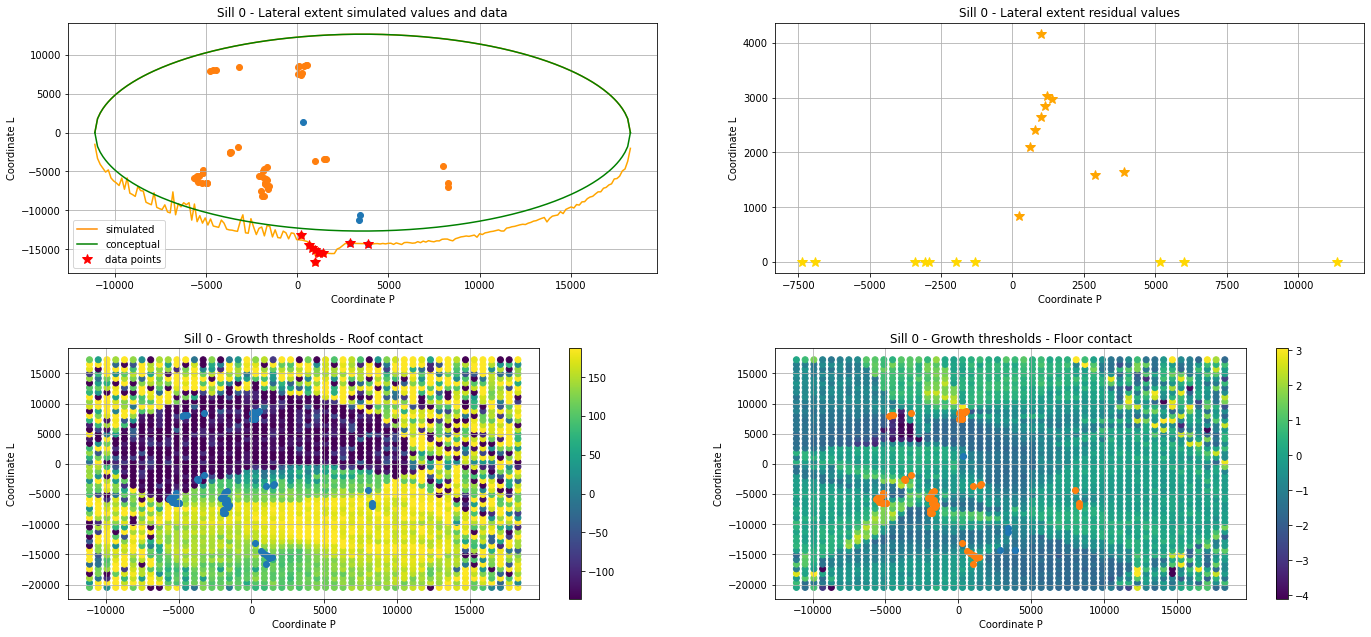

In [16]:
intrusion = Sill_b1
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


Building intrusion using geometric scaling parameters: estimated thicknes = 151 meters
Not enought lateral data for simulation of side L<0, Using roof/floor data to condition the conceptual model
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 44
                 Number trimmed                = 0
                 Weighted Average              = 2228.1832
                 Weighted Variance             = 804091.3398
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.9716
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   currently on node 240
   currently on 

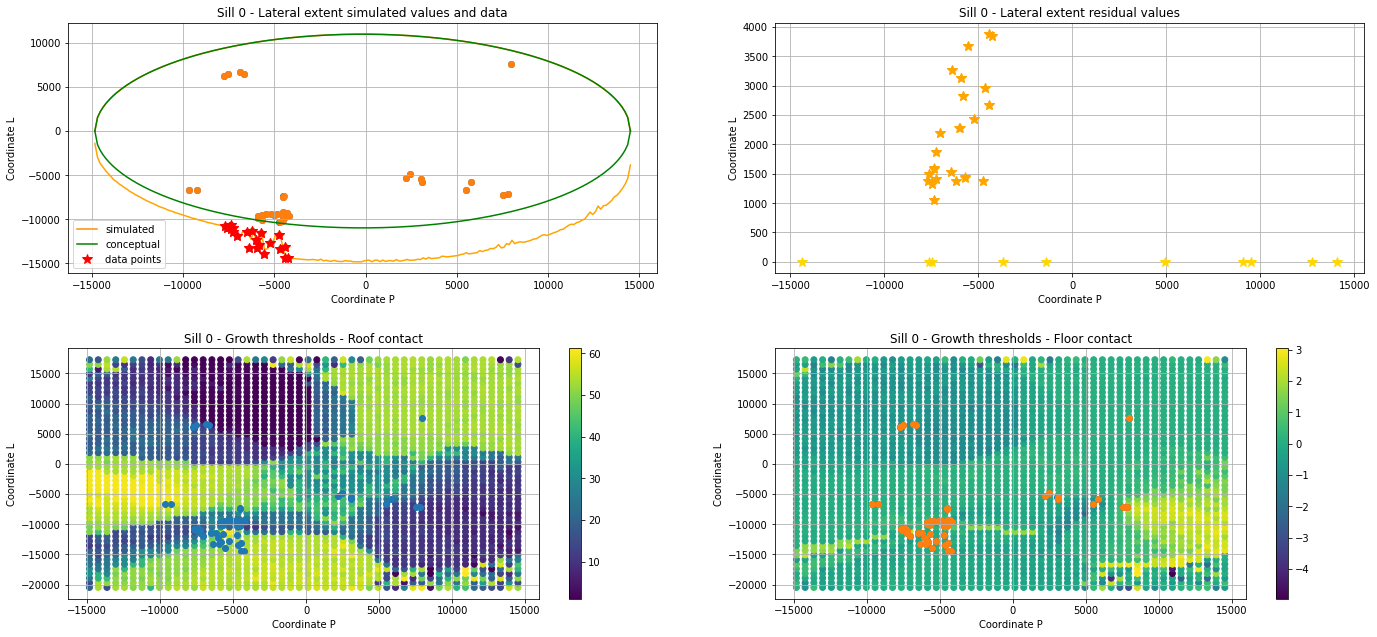

In [17]:
intrusion = Sill_b2
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

In [21]:
sill1_data = model.data[(model.data['feature_name']=='Sill_b1')].loc[:,['X','Y','Z']].to_numpy()
sill2_data = model.data[(model.data['feature_name']=='Sill_b2')].loc[:,['X','Y','Z']].to_numpy()

In [19]:
conformable_feature.faults_enabled

True

In [20]:
# # visualization of 3D model od dolerites before post-intrusion faulting

viewer0 = LavaVuModelViewer(model, background='white')

# -- add stratigraphy
viewer0.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# -- add pre-intrusion faults
viewer0.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')


# add intrusion
viewer0.add_isosurface(Sill_b1, isovalue = 0, colour = 'orange')
viewer0.add_isosurface(Sill_b2, isovalue = 0, colour = 'orange')
# viewer0.add_isosurface(Sill_a4.intrusion_frame[0], isovalue = 0, colour = 'red')

viewer0.add_points(model.rescale(sill1_data, inplace = False), name = 'sill1_data', pointsize = 10)
viewer0.add_points(model.rescale(sill2_data, inplace = False), name = 'sill2_data', pointsize = 10)

viewer0.ymin = 0.01
viewer0.ymax = 1
viewer0.interactive()

NameError: name 'sill2_data' is not defined

In [22]:
viewer0.add_points(model.rescale(sill1_data, inplace = False), name = 'sill1_data', pointsize = 10)
viewer0.add_points(model.rescale(sill2_data, inplace = False), name = 'sill1_data', pointsize = 10)

viewer0.ymin = 0.01
viewer0.ymax = 1
viewer0.interactive()

Object exists: sill1_data
Object exists: sill1_data


In [25]:
viewer0.xmin = 0.01
viewer0.xmax = 1
viewer0.interactive()

In [23]:
# conformable_feature.faults_enabled = True

uc1 = model.add_unconformity(Sill_b1,0)
model._add_unconformity_above(conformable_feature)
uc2 = model.add_unconformity(Sill_b2,0)
model._add_unconformity_above(conformable_feature)

model.dtm = create_dtm

In [24]:
# visualization of 3D model of dolerites post post-intrusion faulting

viewer = LavaVuModelViewer(model, background='white')

viewer.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')
# -- add stratigraphy
viewer.add_isosurface(conformable_feature['feature'], isovalue = -200, colour = 'darkblue',  name = 'base of Plo')
viewer.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# -- add pre-intrusion faults
viewer.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')

# -- add post-intrusion faults
viewer.add_isosurface(post_intrusion_fault_1, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_2, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3a, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3b, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3f, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_4a, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_4b, isovalue = 0, colour = 'blue')


# add intrusion
viewer.add_isosurface(Sill_b1, isovalue = 0, colour = 'orange')
viewer.add_isosurface(Sill_b2, isovalue = 0, colour = 'orange')

viewer.add_points(model.rescale(sill1_data, inplace = False), name = 'sill1_data', pointsize = 10)
viewer.add_points(model.rescale(sill2_data, inplace = False), name = 'sill2_data', pointsize = 10)


viewer.ymin = 0.01
viewer.ymax = 1
viewer.interactive()

In [ ]:
datetime.now().isoformat(timespec='seconds')   